### Parks MacClellan (Optimum) FIR filter design

This example is mostely taken from the documentation of the scipy function:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html

In [1]:
%matplotlib notebook
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (6.0, 4)

def plot_response(fs, w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 5)
    ax.set_xlim(0, 0.5*fs)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    plt.tight_layout()
    ax.set_title(title)
    return ax

#### Low-pass filter

<IPython.core.display.Javascript object>


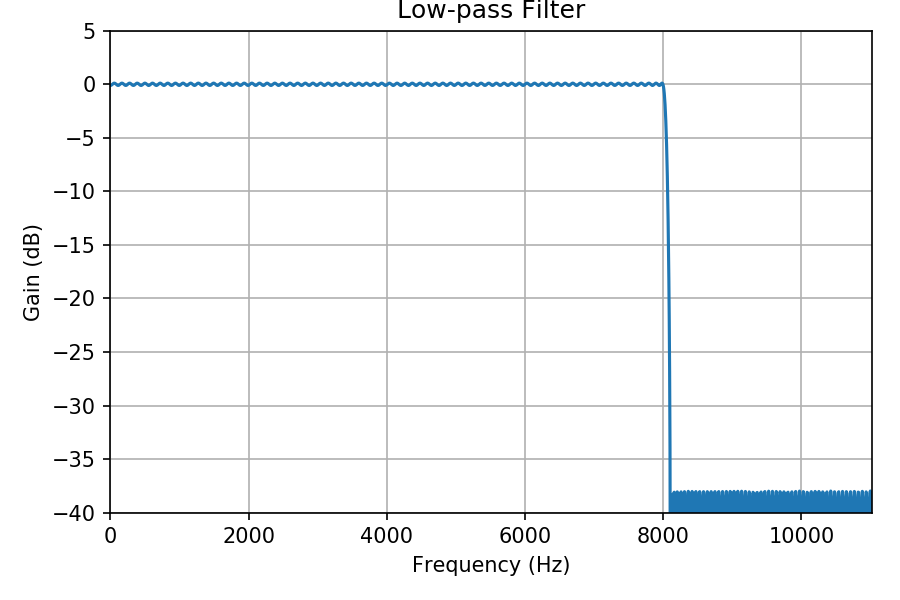

In [8]:
fs = 22050.0       # Sample rate, Hz
cutoff = 8000.0    # Desired cutoff frequency, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 400     # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Low-pass Filter")

#### High-pass filter

<IPython.core.display.Javascript object>


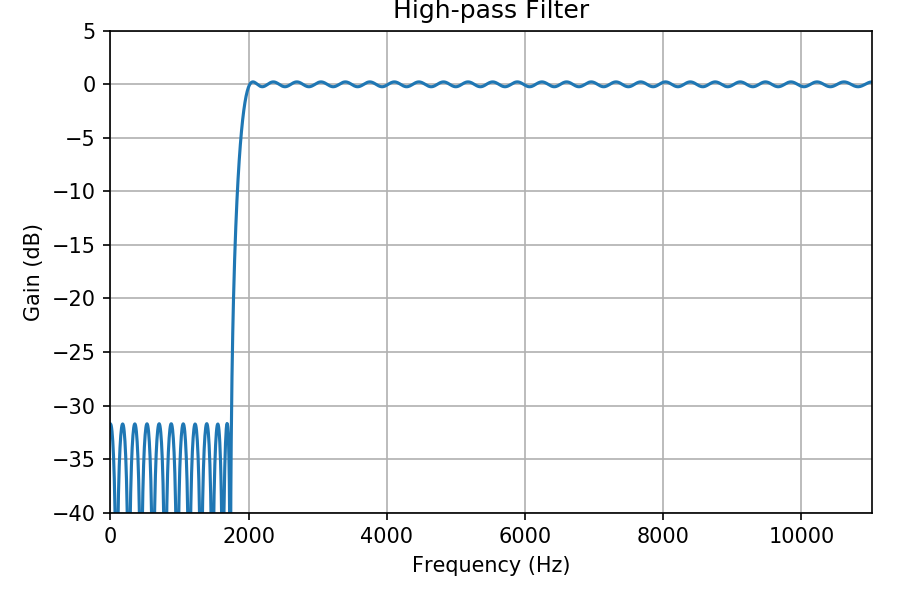

In [7]:
fs = 22050.0       # Sample rate, Hz
cutoff = 2000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*fs],
                    [0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "High-pass Filter")

#### Band-pass filter

<IPython.core.display.Javascript object>


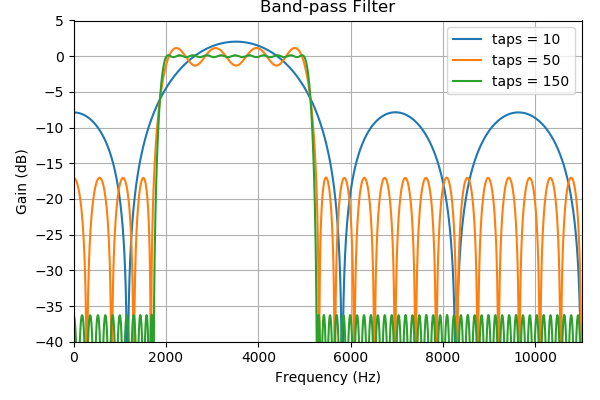

In [31]:
fs = 22000.0         # Sample rate, Hz
band = [2000, 5000]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass band to stop band, Hz

def get_band(numtaps):
    edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*fs]
    taps = signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
    w, h = signal.freqz(taps, [1], worN=2000)
    return w,h

taps = [10,50,150]
w,h = get_band(taps[0])
ax = plot_response(fs, w, h, "Band-pass Filter")
w,h = get_band(taps[1])
ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
w,h = get_band(taps[2])
ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
ax.legend(['taps = '+str(taps[0]),'taps = '+str(taps[1]),'taps = '+str(taps[2])])

In [21]:
#### Band-stop filter

<IPython.core.display.Javascript object>


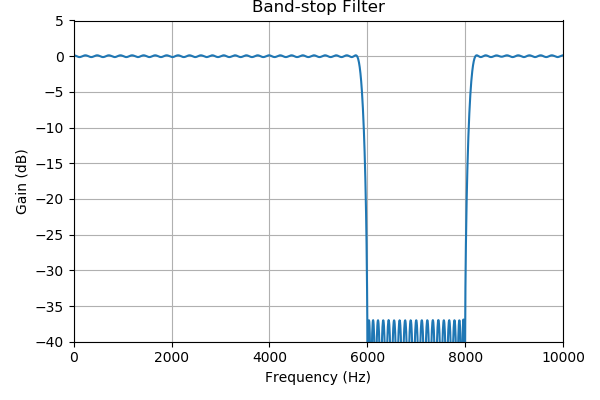

In [22]:
fs = 20000.0         # Sample rate, Hz
band = [6000, 8000]  # Desired stop band, Hz
trans_width = 200    # Width of transition from pass band to stop band, Hz
numtaps = 175        # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [1, 0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-stop Filter")